In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
print(os.path.exists("/content/drive/MyDrive/SS/laptop_price_modf.csv"))

True


In [6]:
ds = pd.read_csv("/content/drive/MyDrive/SS/laptop_price_modf.csv")

In [7]:
ds.head(5)

,Inches,Ram(GB),Weight(kg),Price_euros,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,ScreenResolution_IPS Panel Retina Display 2880x1800,ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Touchscreen 1366x768,ScreenResolution_IPS Panel Touchscreen 1920x1200,ScreenResolution_IPS Panel Touchscreen 2400x1600,ScreenResolution_IPS Panel Touchscreen 2560x1440,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_Quad HD+ 3200x1800,ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_Touchscreen / Full HD 1920x1080,ScreenResolution_Touchscreen / Quad HD+ 3200x1800,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Touchscreen 2256x1504,ScreenResolution_Touchscreen 2400x1600,ScreenResolution_Touchscreen 2560x1440,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GH

In [8]:
X = ds.drop(['Price_euros'], axis=1)
Y = ds['Price_euros']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=0.8,  random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5,  random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

from sklearn import metrics

In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(verbose=0),
    'Extra Trees': ExtraTreesRegressor(verbose=0),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(verbose=0),
    'SGD Regression': SGDRegressor()
}

In [12]:
from sklearn import metrics
import pandas as pd

# Створіть функцію для навчання, передбачення та оцінки моделей
def fit_predict_score(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_valid)
    return metrics.mean_squared_error(Y_valid, Y_pred), metrics.r2_score(Y_valid, Y_pred)

# Створіть функцію для оцінки моделей
def evaluate_models(models, X_train, y_train, X_valid, Y_valid):
    results = {'Model': [], 'MSE': [], 'R^2 Score': []}
    for model_name, model in models.items():
        print(f'Evaluating {model_name}...')
        mse, r2_score = fit_predict_score(model, X_train, Y_train, X_valid, Y_valid)
        results['Model'].append(model_name)
        results['MSE'].append(mse)
        results['R^2 Score'].append(r2_score)
    return pd.DataFrame(results)

# Оцінюємо моделі
results = evaluate_models(models, X_train, Y_train, X_valid, Y_valid)


Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating K-Nearest Neighbors...
Evaluating SVR...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating SGD Regression...


In [13]:
results.sort_values('R^2 Score', ascending=False)

,Model,MSE,R^2 Score
1,Ridge Regression,8.024739e+04,7.573497e-01
10,SGD Regression,8.239727e+04,7.508489e-01
3,K-Nearest Neighbors,8.419611e+04,7.454097e-01
6,Random Forest,8.685811e+04,7.373604e-01
2,Lasso Regression,9.156058e+04,7.231411e-01
9,Gradient Boosting,9.541269e+04,7.114932e-01
7,Extra Trees,9.557300e+04,7.110085e-01
5,Decision Tree,1.317125e+05,6.017306e-01
8,AdaBoost,1.828651e+05,4.470567e-01
4,SVR,3.468031e+05,-4.865550e-02


In [14]:
from sklearn.model_selection import KFold
import numpy as np

# Створення моделі Ridge Regression з певним значенням alpha
ridge_model = Ridge(alpha=0.1)

# Визначення параметрів для KFold
k_folds = 5  # Кількість розділень (зазвичай використовують від 5 до 10)
kf = KFold(n_splits=k_folds)

# Створення списків для збереження метрик
mse_scores = []
r2_scores = []

# Проведення крос-валідації
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]

    # Навчання моделі
    ridge_model.fit(X_train_fold, Y_train_fold)

    # Передбачення та оцінка на тестовому наборі
    Y_pred_fold = ridge_model.predict(X_test_fold)
    mse_fold = metrics.mean_squared_error(Y_test_fold, Y_pred_fold)
    r2_fold = metrics.r2_score(Y_test_fold, Y_pred_fold)

    # Збереження результатів
    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)


Y_pred = ridge_model.predict(X_test)
# Обчислення середніх значень метрик за всіма розділеннями
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

# Вивід результатів
print(f'Mean MSE: {mean_mse}')
print(f'Mean R^2 Score: {mean_r2}')


Mean MSE: 99674.10009579812
Mean R^2 Score: 0.745233905841493


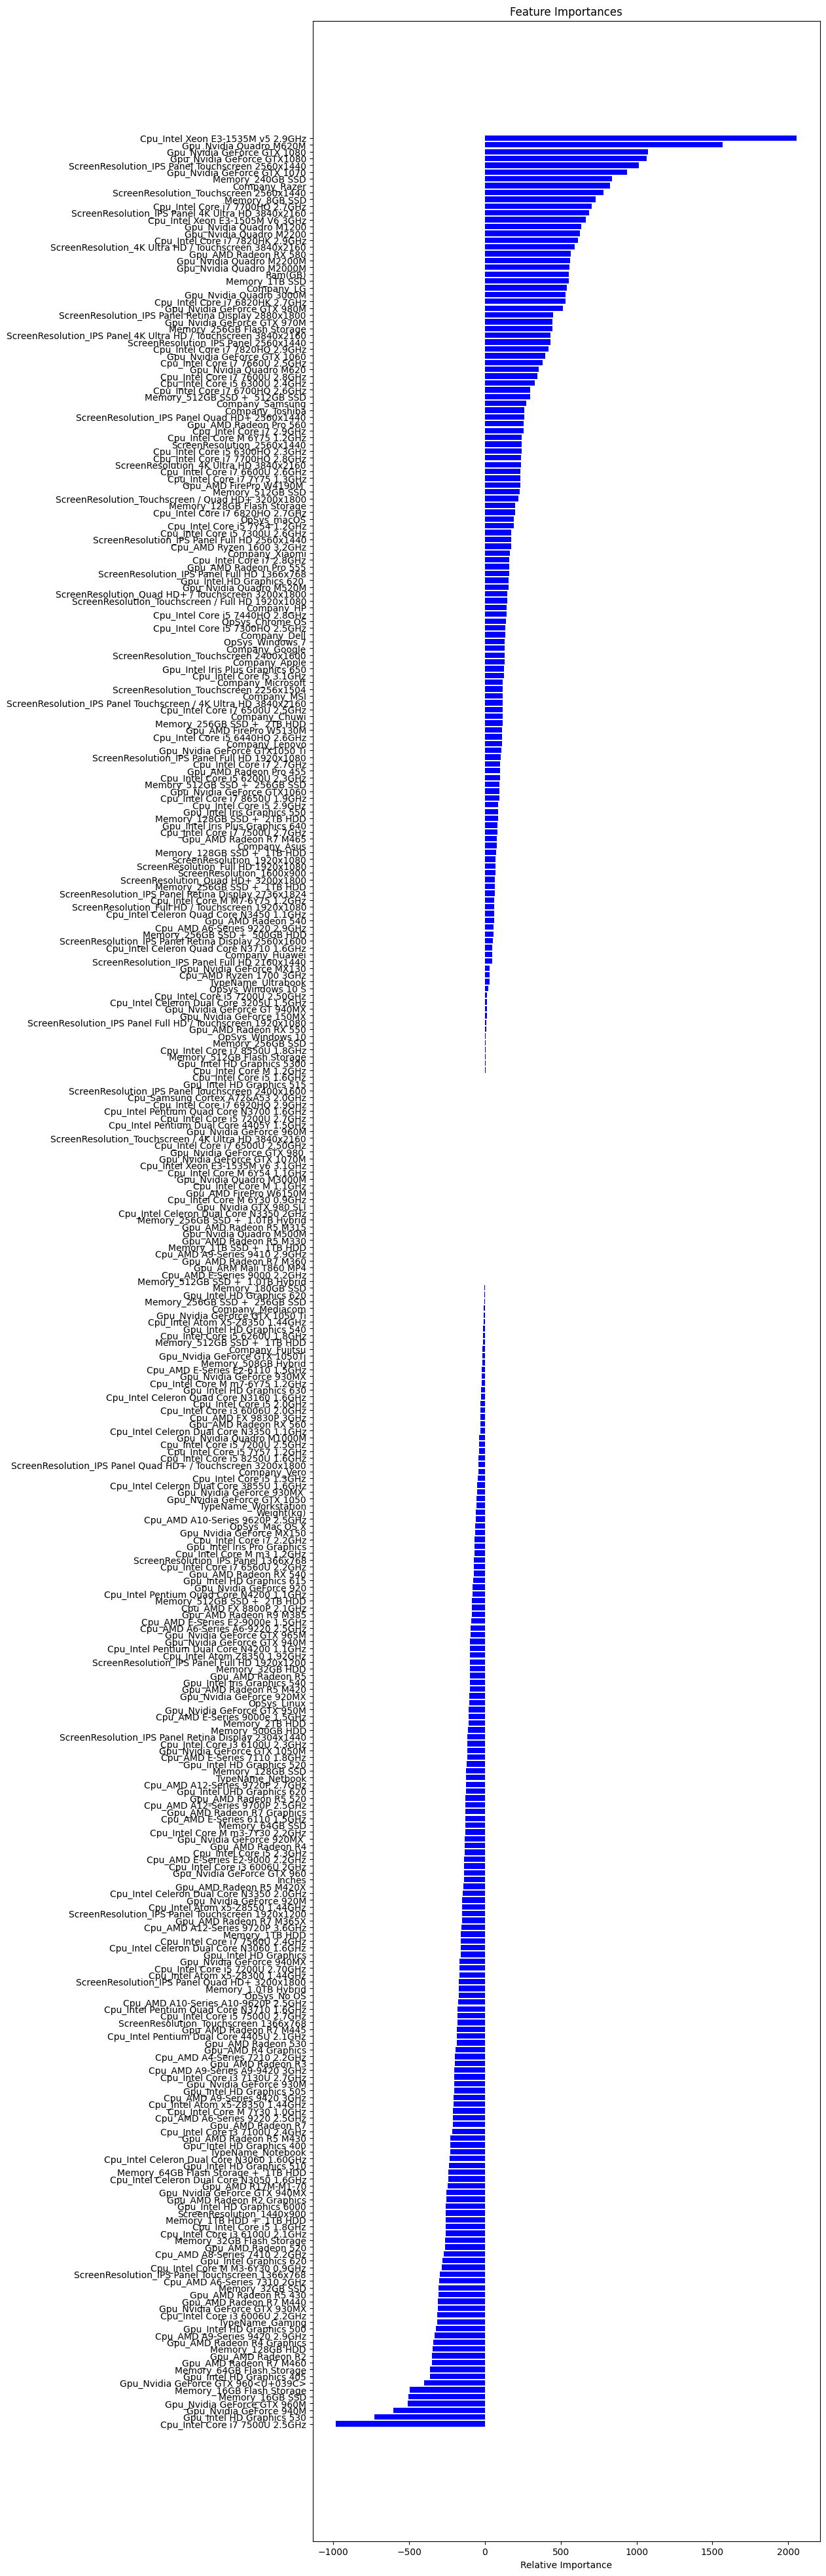

In [21]:
importances = ridge_model.coef_
indices = np.argsort(importances)
plt.figure(figsize=(10, 50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [22]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(ridge_model, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Gpu_Nvidia GeForce GTX 1070 (0.076761)
2. TypeName_Gaming (0.067223)
3. TypeName_Notebook (0.058643)
4. Gpu_Nvidia GeForce GTX1080 (0.043280)
5. ScreenResolution_IPS Panel Touchscreen 2560x1440 (0.040293)
6. Ram(GB) (0.038811)
7. ScreenResolution_IPS Panel 4K Ultra HD 3840x2160 (0.032985)
8. Cpu_Intel Xeon E3-1505M V6 3GHz (0.031333)
9. Cpu_Intel Core i7 7700HQ 2.8GHz (0.025655)
10. Memory_512GB SSD (0.025012)
11. Gpu_Nvidia Quadro M1200 (0.021731)
12. ScreenResolution_Touchscreen 2560x1440 (0.017924)
13. Gpu_Intel HD Graphics 500 (0.016935)
14. Company_HP (0.016926)
15. Memory_1TB HDD (0.016914)
16. Memory_1TB SSD (0.016126)
17. Company_LG (0.015720)
18. Cpu_Intel Core i3 7100U 2.4GHz (0.014329)
19. ScreenResolution_4K Ultra HD / Touchscreen 3840x2160 (0.013619)
20. Gpu_Nvidia GeForce GTX 1060 (0.013492)
21. Cpu_Intel Core i7 6700HQ 2.6GHz (0.011333)
22. Gpu_Nvidia Quadro 3000M (0.011293)
23. OpSys_Windows 7 (0.010083)
24. Memory_64GB Flash Storage (0.009953)
25. C

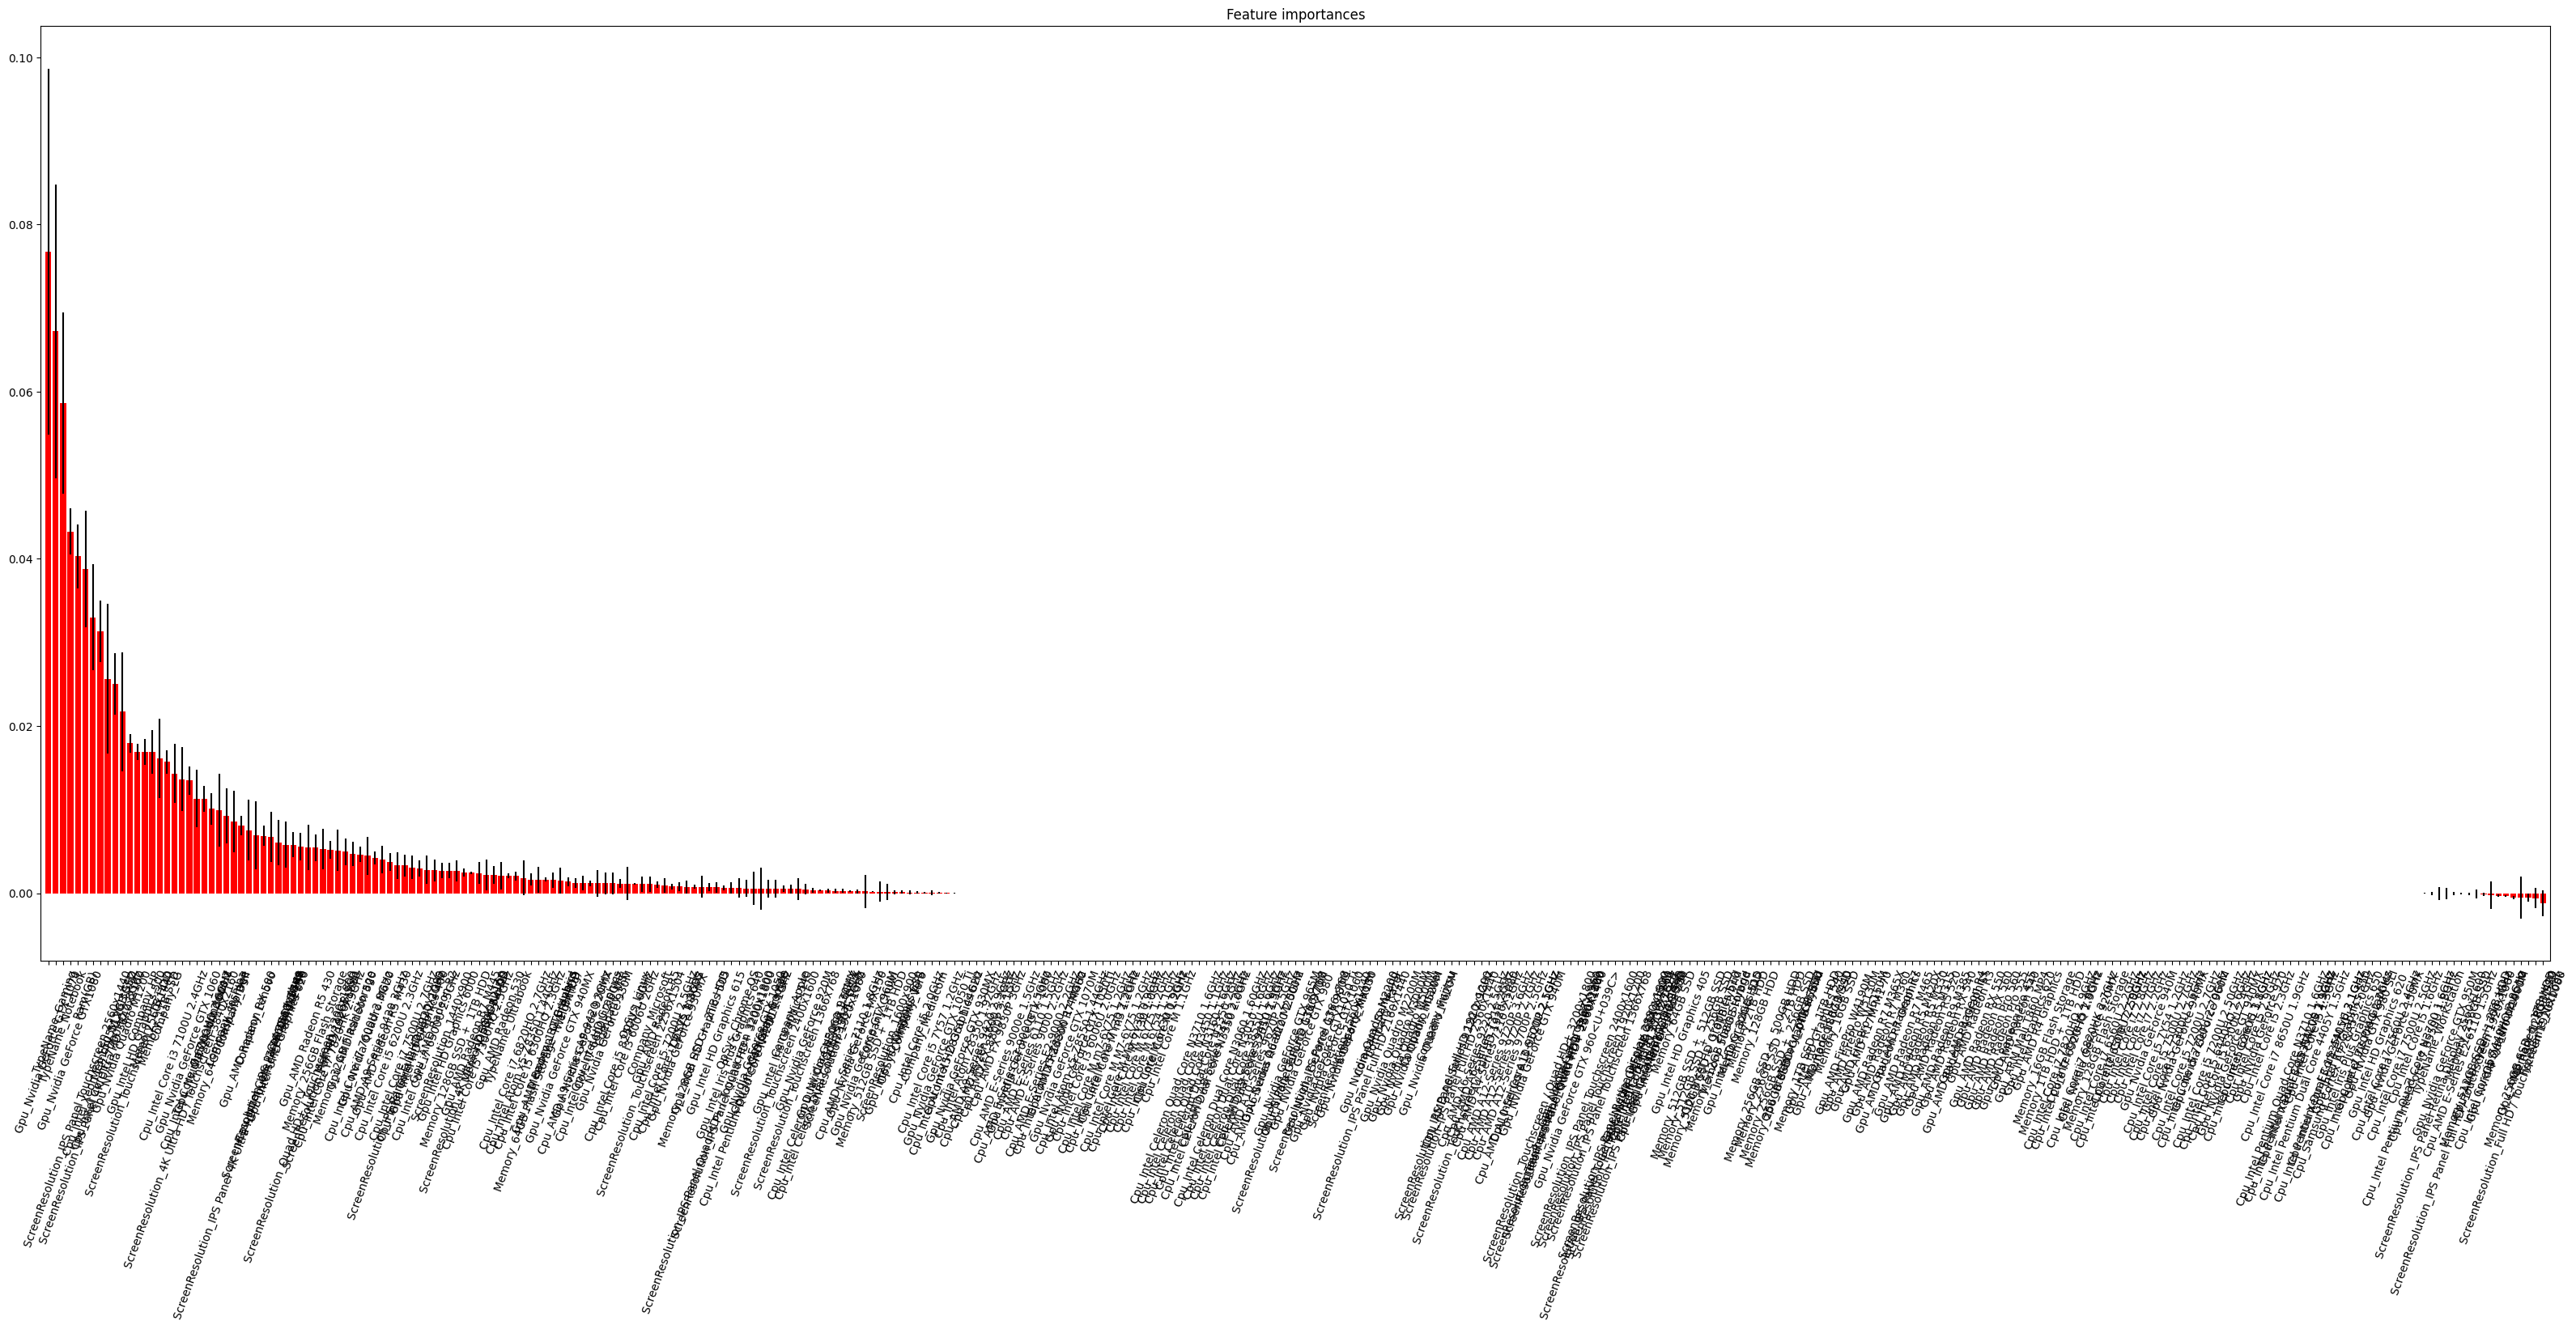

In [24]:
plt.figure(figsize=(40, 15))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()